#1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples

    ->Anomaly detection, also called outlier detection, is the identification of rare events, observations, or items that deviate significantly from the rest of the data.

    The three main types of anomalies are:

    Point anomalies: A single, individual data point that stands out as abnormal when compared to the entire dataset.

    Contextual anomalies: A data point that is abnormal only within a specific context, such as time, location, or other features.

    Collective anomalies: A group of related data points that, as a collection, deviates significantly from the rest of the dataset, even if individual data points within the group do not appear anomalous on their own.

#2.Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

    ->Isolation Forest is a tree-based algorithm that efficiently isolates anomalies, making it scalable for large, high-dimensional datasets and ideal for detecting global outliers.
    
    DBSCAN, a density-based clustering algorithm, identifies outliers as noise points in low-density regions, effectively handling arbitrary cluster shapes.
    
    Local Outlier Factor (LOF) is also density-based but compares a point's density to its neighbors, excelling at finding local anomalies in data with varying densities.

#3.What are the key components of a Time Series? Explain each with one example.

    ->Trend: The long-term, overall movement or direction of the data. It shows whether the series is generally increasing, decreasing, or remaining stable over a long period.
    
    ->Seasonality: A repeating and predictable pattern or fluctuation that occurs at fixed, regular intervals, such as daily, weekly, or yearly.
    
    ->Cyclicality: Describes fluctuations that repeat over time but do not have a fixed, predictable period, and are generally longer in duration than a seasonal pattern.
    
    ->Irregularity: The unpredictable, random, and erratic variations in the data that cannot be explained by the other components. It represents the residual variability.

#4.Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

    ->A stationary time series has statistical properties like mean and variance that remain constant over time. It is important for forecasting models that rely on these assumptions.
    
    To test for stationarity, one can visually inspect a plot for trends or seasonality, or use statistical tests like the Augmented Dickey-Fuller (ADF) or Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests

#5.Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

    ->The core difference lies in how they handle data complexity.

    AR and MA are the basic building blocks for stationary time series, using past values and past forecast errors, respectively.
    
    ARIMA adds the ability to handle non-stationary data with a trend by using differencing.
    
    SARIMA extends ARIMA to include an extra seasonal component, making it suitable for data with repeating patterns.
    
    SARIMAX is the most comprehensive, adding exogenous, or external, variables to a SARIMA model to account for outside factors that influence the series.


#8.Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

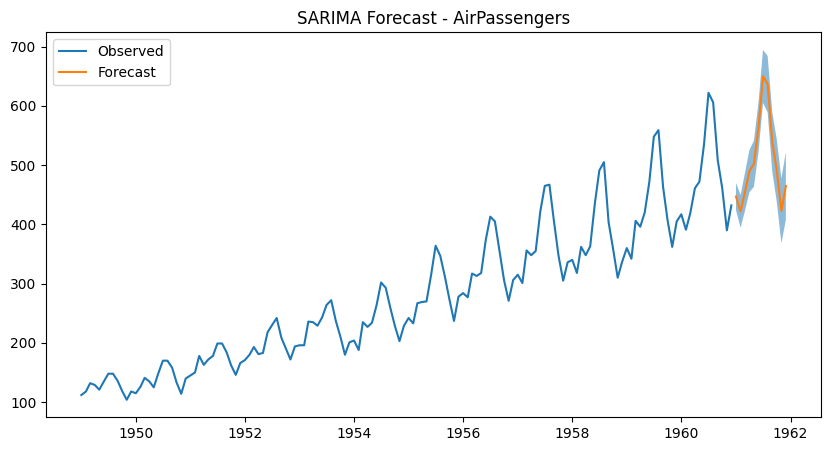

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.rename(columns={'#Passengers':'Passengers'}, inplace=True)
df = df.asfreq('MS')
model = SARIMAX(df['Passengers'], order=(0,1,1), seasonal_order=(0,1,1,12))
res = model.fit(disp=False)
forecast = res.get_forecast(12)
pred = forecast.predicted_mean
ci = forecast.conf_int()
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Observed')
plt.plot(pred.index, pred, label='Forecast')
plt.fill_between(pred.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.5)
plt.legend(); plt.title("SARIMA Forecast - AirPassengers")
plt.show()


#10.You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow:
    ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
    ● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
    ● How would you validate and monitor the performance over time?
    ● How would this solution help business decisions or operations?


**Anomaly Detection**:
    
    Use Isolation Forest for fast, scalable detection of spikes/drops in streaming data.
    Add LOF if regional context matters.

**Short-Term Forecasting**:

    Use SARIMAX (seasonal ARIMA with exogenous variables) to include weather & region.
    Good for 15-minute ahead demand prediction.

**Validation & Monitoring**

    Backtesting with RMSE/MAPE.
    Monitor concept drift and retrain if accuracy drops.
    Track false positives/negatives for anomaly alerts.

**Business Value**

    Balance supply & demand → fewer blackouts.
    Optimize costs → avoid over-purchasing reserve energy.
    Detect grid issues early → prevent outages.
    Improve reliability & planning for regions/customers.

#6.Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components


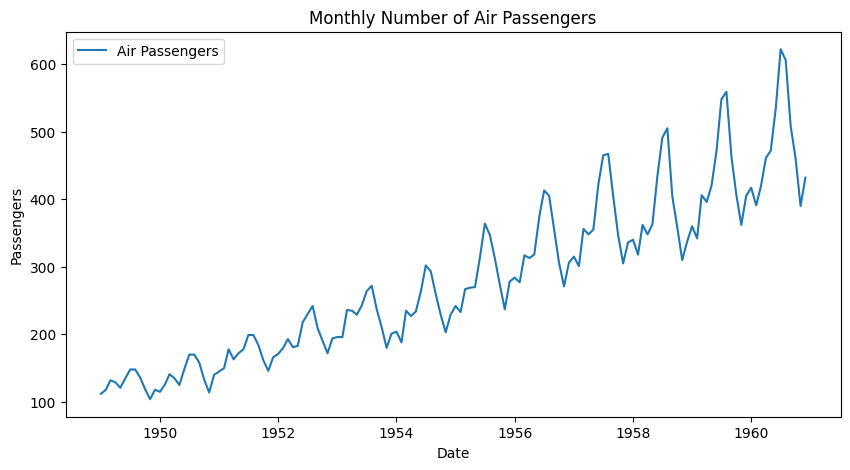

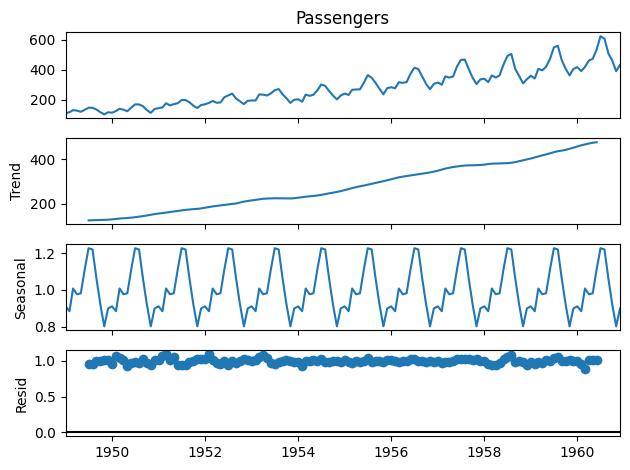

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = "AirPassengers.csv"
data = pd.read_csv(file_path)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label="Air Passengers")
plt.title("Monthly Number of Air Passengers")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')
decomposition.plot()
plt.show()


#9.Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

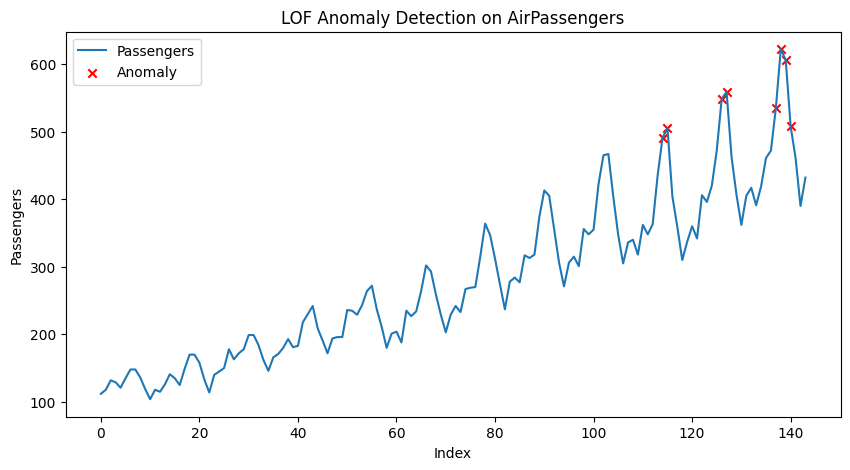

In [4]:

from sklearn.neighbors import LocalOutlierFactor
df = pd.read_csv("AirPassengers.csv")
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
X = df[['Passengers']]
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)
df['Anomaly'] = y_pred
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Passengers'], label="Passengers")
anomalies = df[df['Anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['Passengers'], color='red', label="Anomaly", marker='x')

plt.title("LOF Anomaly Detection on AirPassengers")
plt.xlabel("Index")
plt.ylabel("Passengers")
plt.legend()
plt.show()
